# Building A Handwritten Digits Classifier

In this Guided Project, I will: 
- explore image classification
- observe the limitations of traditional machine learning models for image classification
- train, test, and improve a few different deep neural networks for image classification

I will be using the `load_digits()` fucntion from `sklearn.datasets`, which returns a copy of [hand-written digits dataset](https://archive.ics.uci.edu/dataset/80/optical+recognition+of+handwritten+digits) from UCI.

Dataframes are a tabular representation of data, each image is represented as a row of pixel values. To visualize an image from the dataframe, I need to reshape the image back to its original dimensions (28 x 28 pixels). To visualize the image, I need to reshape these pixel values back into the 28 by 28 and plot them on a coordinate grid.

In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt
%matplotlib inline

digits = load_digits()
digits

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 'target': array([0, 1, 2, ..., 8, 9, 8]),
 'frame': None,
 'feature_names': ['pixel_0_0',
  'pixel_0_1',
  'pixel_0_2',
  'pixel_0_3',
  'pixel_0_4',
  'pixel_0_5',
  'pixel_0_6',
  'pixel_0_7',
  'pixel_1_0',
  'pixel_1_1',
  'pixel_1_2',
  'pixel_1_3',
  'pixel_1_4',
  'pixel_1_5',
  'pixel_1_6',
  'pixel_1_7',
  'pixel_2_0',
  'pixel_2_1',
  'pixel_2_2',
  'pixel_2_3',
  'pixel_2_4',
  'pixel_2_5',
  'pixel_2_6',
  'pixel_2_7',
  'pixel_3_0',
  'pixel_3_1',
  'pixel_3_2',
  'pixel_3_3',
  'pixel_3_4',
  'pixel_3_5',
  'pixel_3_6',
  'pixel_3_7',
  'pixel_4_0',
  'pixel_4_1',
  'pixel_4_2',
  'pixel_4_3',
  'pixel_4_4',
  'pixel_4_5',
  'pixel_4_6',
  'pixel_4_7',
  'pixel_5_0',
  'pixel_5_1',
 

In [2]:
labels = pd.Series(digits["target"])
data = pd.DataFrame(digits["data"],columns=digits["feature_names"])
data.head()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


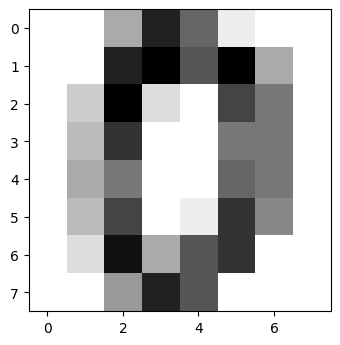

In [3]:
first_image = data.iloc[0]
np_image = first_image.values
np_image = np_image.reshape(8,8)
plt.imshow(np_image, cmap='gray_r')
plt.show()

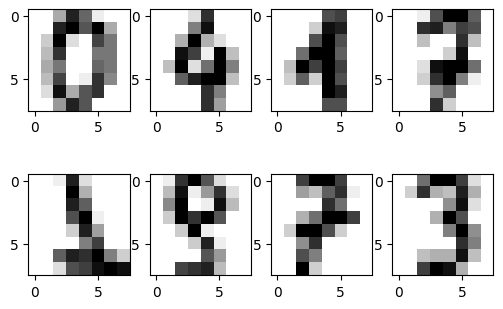

In [4]:
f, axarr = plt.subplots(2, 4)

axarr[0,0].imshow(data.iloc[0].values.reshape(8,8), cmap='gray_r')
axarr[0,1].imshow(data.iloc[100].values.reshape(8,8), cmap='gray_r')
axarr[0,2].imshow(data.iloc[200].values.reshape(8,8), cmap='gray_r')
axarr[0,3].imshow(data.iloc[300].values.reshape(8,8), cmap='gray_r')

axarr[1,0].imshow(data.iloc[1000].values.reshape(8,8), cmap='gray_r')
axarr[1,1].imshow(data.iloc[1100].values.reshape(8,8), cmap='gray_r')
axarr[1,2].imshow(data.iloc[1200].values.reshape(8,8), cmap='gray_r')
axarr[1,3].imshow(data.iloc[1300].values.reshape(8,8), cmap='gray_r')

plt.show()

### K-Nearest Neighbors Model

K-neighbors does not make assumptions about linearity between features and labels, which can capture non-linearity in the data.

In [5]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

def train(k):
    model = KNeighborsClassifier(n_neighbors=k)
    return model

neighbors = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]

accuracies = []

for k in neighbors:
    scores = cross_val_score(train(k), data, labels, scoring="accuracy", cv=4)
    mean_score = scores.mean()
    accuracies.append(mean_score)
    print(k,"neighbors accuracy: ", mean_score)

1 neighbors accuracy:  0.967724573125464
2 neighbors accuracy:  0.9632727047760454
3 neighbors accuracy:  0.9632764167285326
4 neighbors accuracy:  0.9643924771096264
5 neighbors accuracy:  0.9627233358079683
6 neighbors accuracy:  0.9604949269982678
7 neighbors accuracy:  0.9582714674585499
8 neighbors accuracy:  0.957713437268003
9 neighbors accuracy:  0.9566060381093788
10 neighbors accuracy:  0.9521516951249691
11 neighbors accuracy:  0.9521479831724821
12 neighbors accuracy:  0.9538195991091314
13 neighbors accuracy:  0.9510343974263796
14 neighbors accuracy:  0.9521492204899777
15 neighbors accuracy:  0.9510356347438753


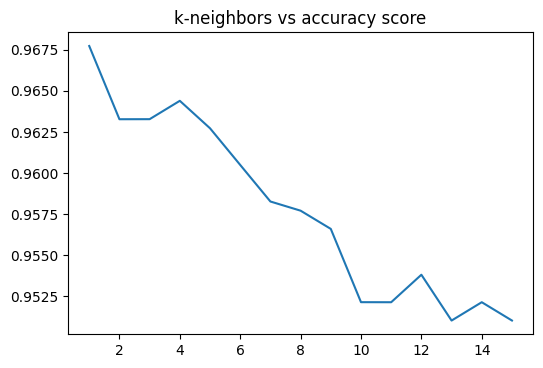

In [6]:
plt.plot(neighbors, accuracies)
plt.title("k-neighbors vs accuracy score")
plt.show()

### Neural Network with One Hidden Layer

There are a few downsides to using k-nearest neighbors:
- high memory usage (for each new unseen observation, many comparisons need to be made to seen observations)
- no model representation to debug and explore  
So I will now try a neural network with a single hidden layer. I will use the `MLPClassifier` package from scikit-learn.

In [7]:
from sklearn.neural_network import MLPClassifier

neurons = [8, 16, 32, 64, 128, 256]
nn_accuracies = []

for n in neurons:
    nn = MLPClassifier(hidden_layer_sizes=(n,), verbose=False)
    scores = cross_val_score(nn, data, labels, scoring="accuracy", cv=4)
    mean_score = scores.mean()
    nn_accuracies.append(mean_score)
    print(n,"neurons accuracy: ", mean_score)

/dataquest/system/env/python3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/dataquest/system/env/python3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/dataquest/system/env/python3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/dataquest/system/env/python3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



8 neurons accuracy:  0.8347574857708489


/dataquest/system/env/python3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/dataquest/system/env/python3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/dataquest/system/env/python3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/dataquest/system/env/python3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



16 neurons accuracy:  0.9065008661222469


/dataquest/system/env/python3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/dataquest/system/env/python3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/dataquest/system/env/python3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/dataquest/system/env/python3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



32 neurons accuracy:  0.9293157634248949
64 neurons accuracy:  0.9348787428854244
128 neurons accuracy:  0.9387750556792873
256 neurons accuracy:  0.9476899282355852


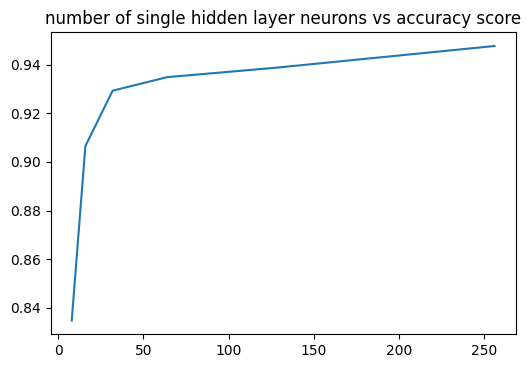

In [8]:
plt.plot(neurons, nn_accuracies)
plt.title("number of single hidden layer neurons vs accuracy score")
plt.show()

The neural network with a single hidden approached 96% accuracy with 256 neurons. But the K-neighbors model with 1 neighbor had an accuracy over 96%.  
So there is no advantage of using a single hidden layer neural network over K-neighbors.  

### Neural Network With Two Hidden Layers

Adding more layers to a network should drastically improve accuracy

In [11]:
two_neurons = [8, 16, 32, 64, 128, 256]
two_nn_accuracies = []

for n in two_neurons:
    nn = MLPClassifier(hidden_layer_sizes=(n,n), verbose=False)
    scores = cross_val_score(nn, data, labels, scoring="accuracy", cv=4)
    mean_score = scores.mean()
    two_nn_accuracies.append(mean_score)
    print(n,"neurons in 2 hidden layers accuracy: ", mean_score)

/dataquest/system/env/python3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/dataquest/system/env/python3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/dataquest/system/env/python3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/dataquest/system/env/python3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



8 neurons in 2 hidden layers accuracy:  0.8758921059143776


/dataquest/system/env/python3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/dataquest/system/env/python3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/dataquest/system/env/python3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/dataquest/system/env/python3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



16 neurons in 2 hidden layers accuracy:  0.914850284583024
32 neurons in 2 hidden layers accuracy:  0.9309960405840139
64 neurons in 2 hidden layers accuracy:  0.9432269240287058
128 neurons in 2 hidden layers accuracy:  0.9538109378866617
256 neurons in 2 hidden layers accuracy:  0.9621615936649344


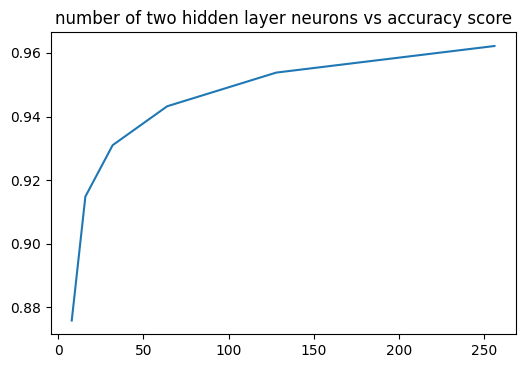

In [12]:
plt.plot(two_neurons, two_nn_accuracies)
plt.title("number of two hidden layer neurons vs accuracy score")
plt.show()

The performance of the two hidden layer exceeds the one hidden layer model, peaking at an accuracy of `96.2%`

### Neural Network With Three Hidden Layers

In [13]:
three_neurons = [10, 64, 128]
three_nn_accuracies = []

for n in three_neurons:
    nn = MLPClassifier(hidden_layer_sizes=(n,n,n), verbose=False)
    scores = cross_val_score(nn, data, labels, scoring="accuracy", cv=6)
    mean_score = scores.mean()
    three_nn_accuracies.append(mean_score)
    print(n,"neurons in 3 hidden layers accuracy: ", mean_score)

/dataquest/system/env/python3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/dataquest/system/env/python3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/dataquest/system/env/python3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/dataquest/system/env/python3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/dataquest/system/env/python3/lib/python3.8/site-packages/sklearn/neural

10 neurons in 3 hidden layers accuracy:  0.8914790040876998
64 neurons in 3 hidden layers accuracy:  0.95491452991453
128 neurons in 3 hidden layers accuracy:  0.9549182460052026


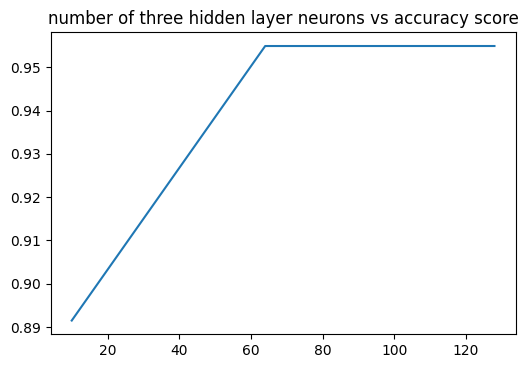

In [14]:
plt.plot(three_neurons, three_nn_accuracies)
plt.title("number of three hidden layer neurons vs accuracy score")
plt.show()

None of the neural network models improved upon the K-neighbors intial accuracy score of `96.7%`